In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aqi-of-manalichennai/manali.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

The data used here is downloaded from https://aqicn.org/data-platform/register/ 
There are plenty of data on AQI available corresponding to each city.
I have used the AQI database of Manali which is a town in the outskirts of chennai, where plenty of factories and oil refineries are present.

In [3]:
df=pd.read_csv(r"/kaggle/input/aqi-of-manalichennai/manali.csv",parse_dates=True)



# Cleaning the data

Like any data science project the first step is to take a good look at it and clean it.


In [4]:
print(df.columns)


Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')


Here the column names are havingg an additional space in their name.
To avoid errors while using the columns name I am renaming the columns.

In [5]:
df.columns=['date','pm25','pm10','o3','no2','so2','co']
print(df.columns)
print(df.dtypes)

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')
date    object
pm25    object
pm10    object
o3      object
no2     object
so2     object
co      object
dtype: object


The datatypes are supposted to be numerical, and float in this case, as te values are decimal.
So I am converting it to the corresponding datatype.

In [6]:
df["o3"] =pd.to_numeric(df["o3"],errors="coerce")
df["no2"] =pd.to_numeric(df["no2"],errors="coerce")
df["so2"] =pd.to_numeric(df["so2"],errors="coerce")
df['co'] =pd.to_numeric(df["co"],errors="coerce")
df['pm25'] =pd.to_numeric(df["pm25"],errors="coerce")
df['pm10'] =pd.to_numeric(df["pm10"],errors="coerce")

print(df.dtypes)

date     object
pm25    float64
pm10    float64
o3      float64
no2     float64
so2     float64
co      float64
dtype: object


Running a quick statistics on the data we have.

In [7]:
df.describe()

,pm25,pm10,o3,no2,so2,co
count,1750.000000,163.000000,210.000000,1980.000000,1939.000000,1922.000000
mean,130.596571,49.036810,30.700000,9.251010,5.899948,9.349116
std,47.693017,33.790913,21.838478,6.627543,7.104069,6.843713
min,21.000000,2.000000,3.000000,1.000000,1.000000,1.000000
25%,99.000000,33.500000,15.000000,5.000000,2.000000,6.000000
50%,128.000000,47.000000,24.000000,8.000000,4.000000,8.000000
75%,161.000000,57.000000,46.000000,11.250000,6.000000,11.000000
max,509.000000,325.000000,180.000000,77.000000,108.000000,119.000000


Now coming to the most important part of Data cleaning
# Handling of missing values
First I will find the number of missing values

In [8]:
df.isnull().sum()

date       0
pm25     352
pm10    1939
o3      1892
no2      122
so2      163
co       180
dtype: int64

Here I check the variability and uniquness of a specific column to understand the data.

In [9]:
print(df.pm10.value_counts())

53.0    7
51.0    7
47.0    6
50.0    6
52.0    6
       ..
34.0    1
76.0    1
60.0    1
25.0    1
19.0    1
Name: pm10, Length: 70, dtype: int64


In [10]:
import missingno as msno

# Visualising missing values
I am importing this library to understand and analyse the missing values more easily, by visualising it


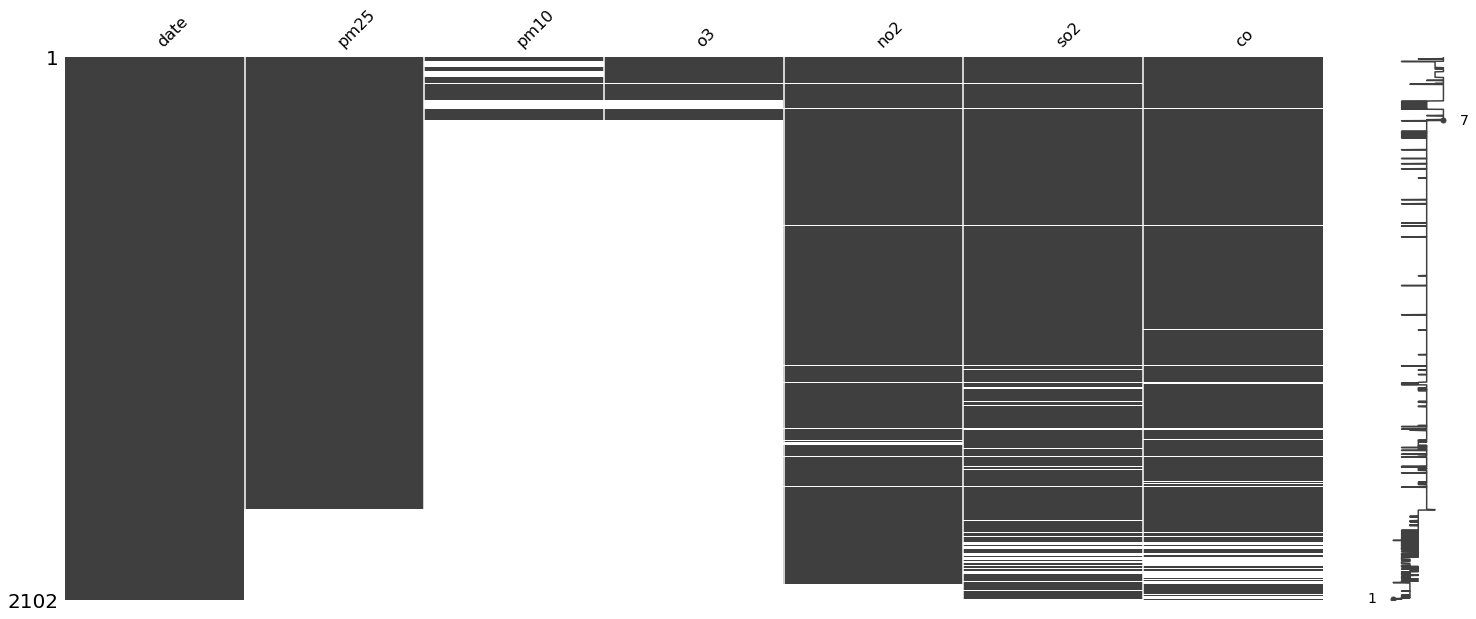

In [11]:
msno.matrix(df)

The index is numerical by default, I am changing the numerical index into DateTimeIndex as our data set is time series.

In [12]:
df.set_index("date")

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2020/6/1,65.0,19.0,47.0,6.0,2.0,11.0
2020/6/2,82.0,8.0,50.0,7.0,1.0,12.0
2020/6/3,83.0,49.0,38.0,6.0,1.0,12.0
2020/6/4,81.0,24.0,43.0,6.0,2.0,12.0
2020/6/5,66.0,39.0,55.0,6.0,2.0,11.0
...,...,...,...,...,...,...
2014/10/3,NaN,NaN,NaN,NaN,NaN,11.0
2014/10/14,NaN,NaN,NaN,NaN,NaN,18.0
2014/10/20,NaN,NaN,NaN,NaN,NaN,17.0


Sorting the index in ascending order.

In [13]:
df.sort_index(axis = 0,ascending=True,inplace=True)

Visualising the missing data as a graph

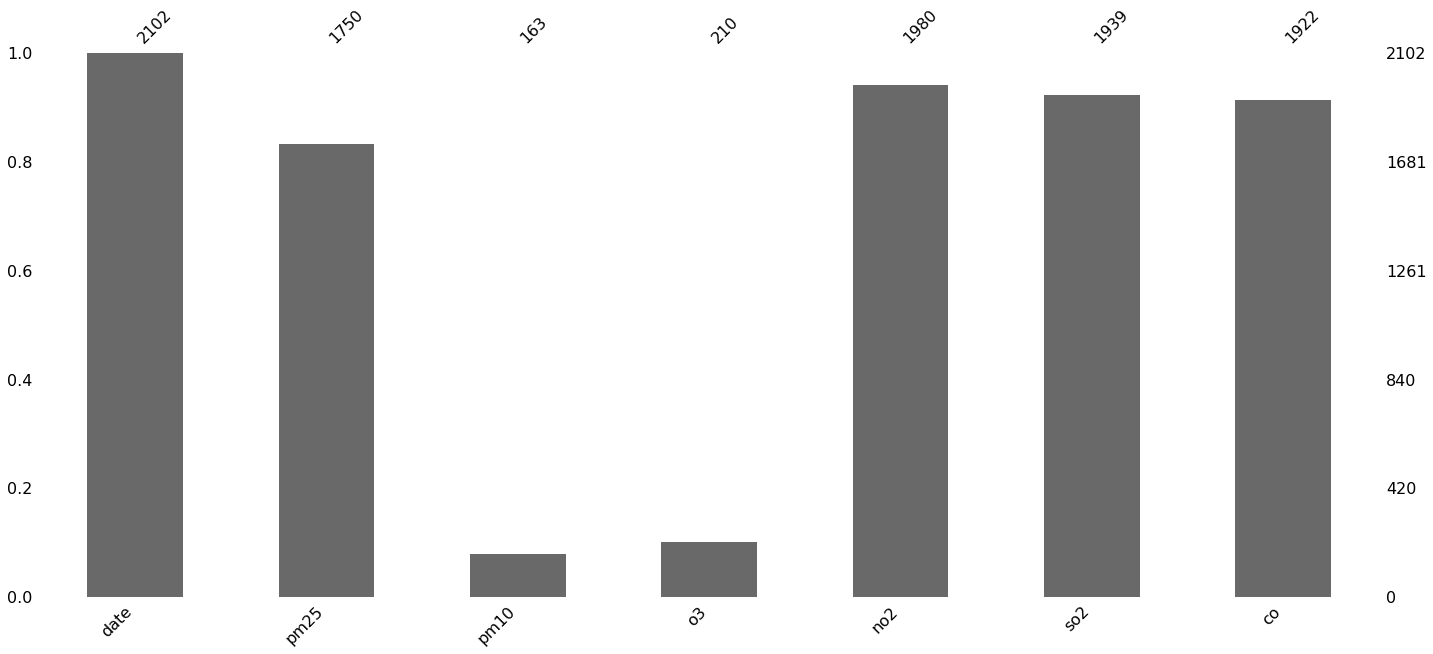

In [14]:
msno.bar(df)

In the column  pm10 and o3 more than 80% of the data is missing.
We can try imputing the missing values with possible values, but since we have only less than 20% data available in these columns, its better to drop these columns.

In [15]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

Dropping the columns (axis=1) and making the changes in the original dataframe(inplace=True)

In [16]:
df.drop(df.columns[[2,3]],axis=1,inplace=True)

In [17]:
df.columns

Index(['date', 'pm25', 'no2', 'so2', 'co'], dtype='object')

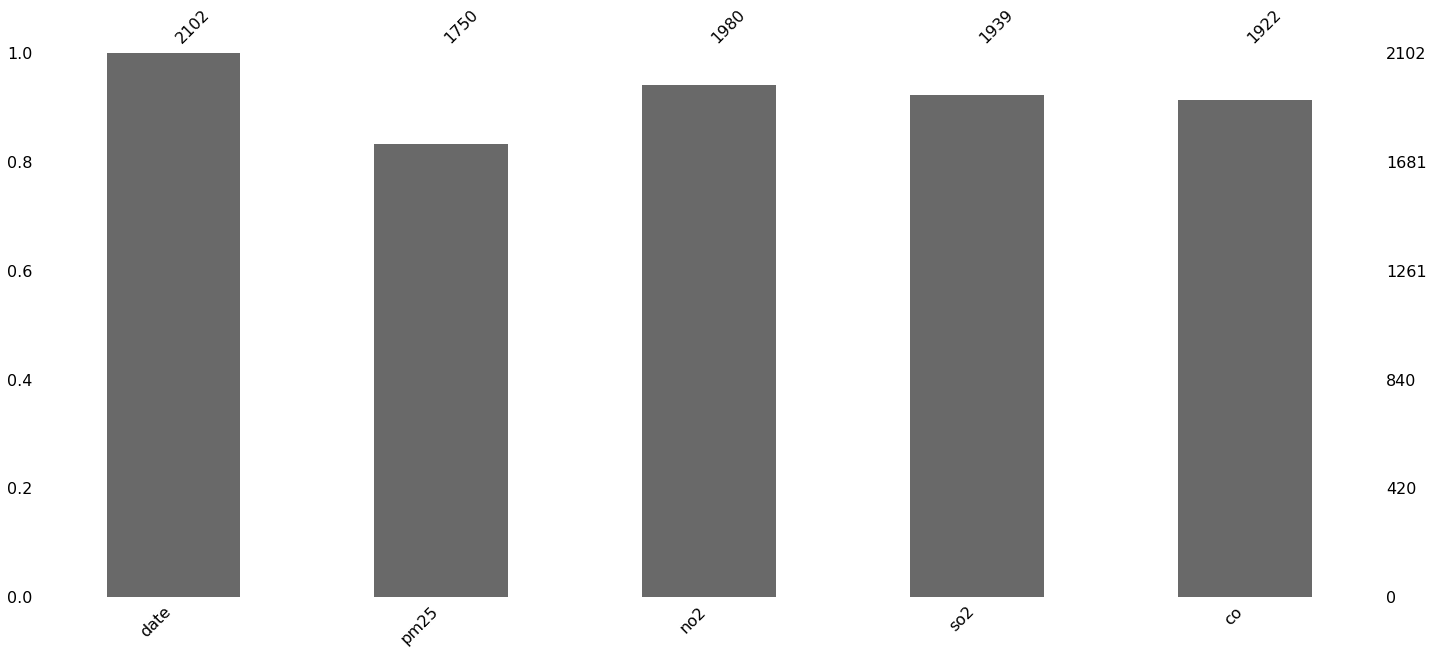

In [18]:
plt.figure(figsize=(16,8))
msno.bar(df)

Now we have only less null values

In [19]:
df.fillna(method="ffill",inplace=True)

I am using the method ffill to fill the missing values
Ffill uses the previous known value and fills the next missing value.
I prefer this method to other imputations because mostly AQI values from one day to the next dont have much difference.

In [20]:
df.isnull().isnull().sum()

date    0
pm25    0
no2     0
so2     0
co      0
dtype: int64

Now we dont have any null values.

In [21]:
df['date']=pd.to_datetime(df['date'])

The datetime column is to be changed to datetime format for using it efficiently

In [22]:
df['date'].min()


Timestamp('2013-12-31 00:00:00')

In [23]:
df['date'].max()

Timestamp('2020-06-19 00:00:00')

# DATA Visualisation

In [24]:
import seaborn as sns

I am plotting the concentration of the gaseous elements present in the air, in a time series x axis.

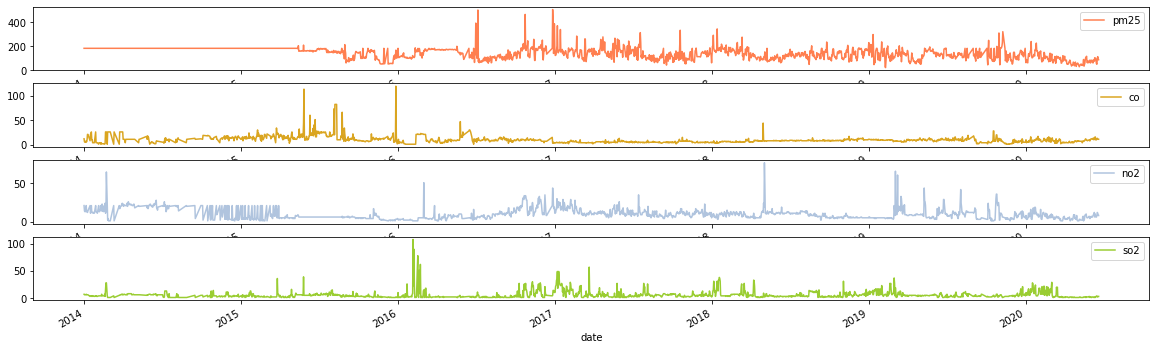

In [25]:
fig, axes = plt.subplots(figsize=(20,6),nrows=4)
df.reset_index().plot(x="date",y="pm25",ax=axes[0],color='coral')
df.reset_index().plot(x="date",y="co",ax=axes[1],color='goldenrod')
df.reset_index().plot (x="date",y="no2",ax=axes[2],color='lightsteelblue')
df.reset_index().plot( x="date",y="so2",ax=axes[3],color='yellowgreen')


Though we couldnt say a lot from this, we can see the similarities in pattern of so2 and no2.This can be because of a single source emmission, such as Ammonia fertiliser manufacturing plant in manali.

In [26]:
df.dtypes

date    datetime64[ns]
pm25           float64
no2            float64
so2            float64
co             float64
dtype: object

After resetting the index for plotting,Im again setting datetimeindex .Its to be noted that when we have datetime index we cant set x=Column name, We have to use only df.index if the column is index column.

In [27]:
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
               '2020-06-09', '2020-06-10',
               ...
               '2014-02-08', '2014-02-16', '2014-02-23', '2014-03-10',
               '2014-03-23', '2014-10-03', '2014-10-14', '2014-10-20',
               '2014-09-15', '2014-09-29'],
              dtype='datetime64[ns]', name='date', length=2102, freq=None)

For having a clear analysis I am breaking down the date into months, days, years respectively.

In [28]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] =df.index.day_name

In [29]:
df["Day"]=df.index.day

In [30]:
df['Weekday Name'] =df.index.day_name()
df['Month Name'] = df.index.month_name()

In [31]:
df.tail(15)


,pm25,no2,so2,co,Year,Month,Weekday Name,Day,Month Name
date,,,,,,,,,
2014-01-05,183.0,21.0,7.0,8.0,2014,1,Sunday,5,January
2014-01-14,183.0,21.0,3.0,8.0,2014,1,Tuesday,14,January
2014-01-17,183.0,21.0,4.0,26.0,2014,1,Friday,17,January
2014-01-27,183.0,21.0,4.0,26.0,2014,1,Monday,27,January
2014-02-03,183.0,21.0,4.0,1.0,2014,2,Monday,3,February
2014-02-08,183.0,21.0,4.0,1.0,2014,2,Saturday,8,February
2014-02-16,183.0,21.0,4.0,1.0,2014,2,Sunday,16,February
2014-02-23,183.0,21.0,4.0,1.0,2014,2,Sunday,23,February
2014-03-10,183.0,21.0,4.0,1.0,2014,3,Monday,10,March


df.loc is an useful function to locate a specific set of data in a dataframe based on the condtion provided.
Here I provided te condition that the datetimeindex = 2017-11-14

In [32]:
df.loc['2017-11-14']

,pm25,no2,so2,co,Year,Month,Weekday Name,Day,Month Name
date,,,,,,,,,
2017-11-14,76.0,6.0,3.0,7.0,2017,11,Tuesday,14,November


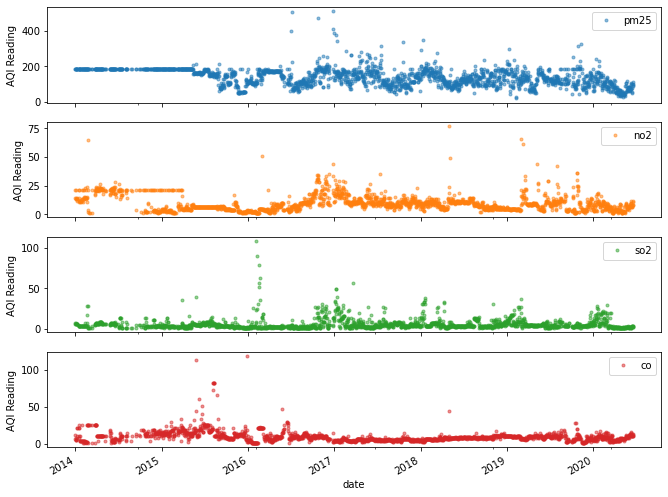

In [33]:
cols_plot = ['pm25', 'no2', 'so2','co']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('AQI Reading')

Scatterplot is more efficient in studying value based datasets .Here we can see some spikes in 2016 and 2017.At some period like this, due to geographical and industrial reasons the AQI became very poor.

Heres a monthwise analysis.
The so2 and no2 are mostly under safe limit.But the pm25 and co has been found in critically risk levels.

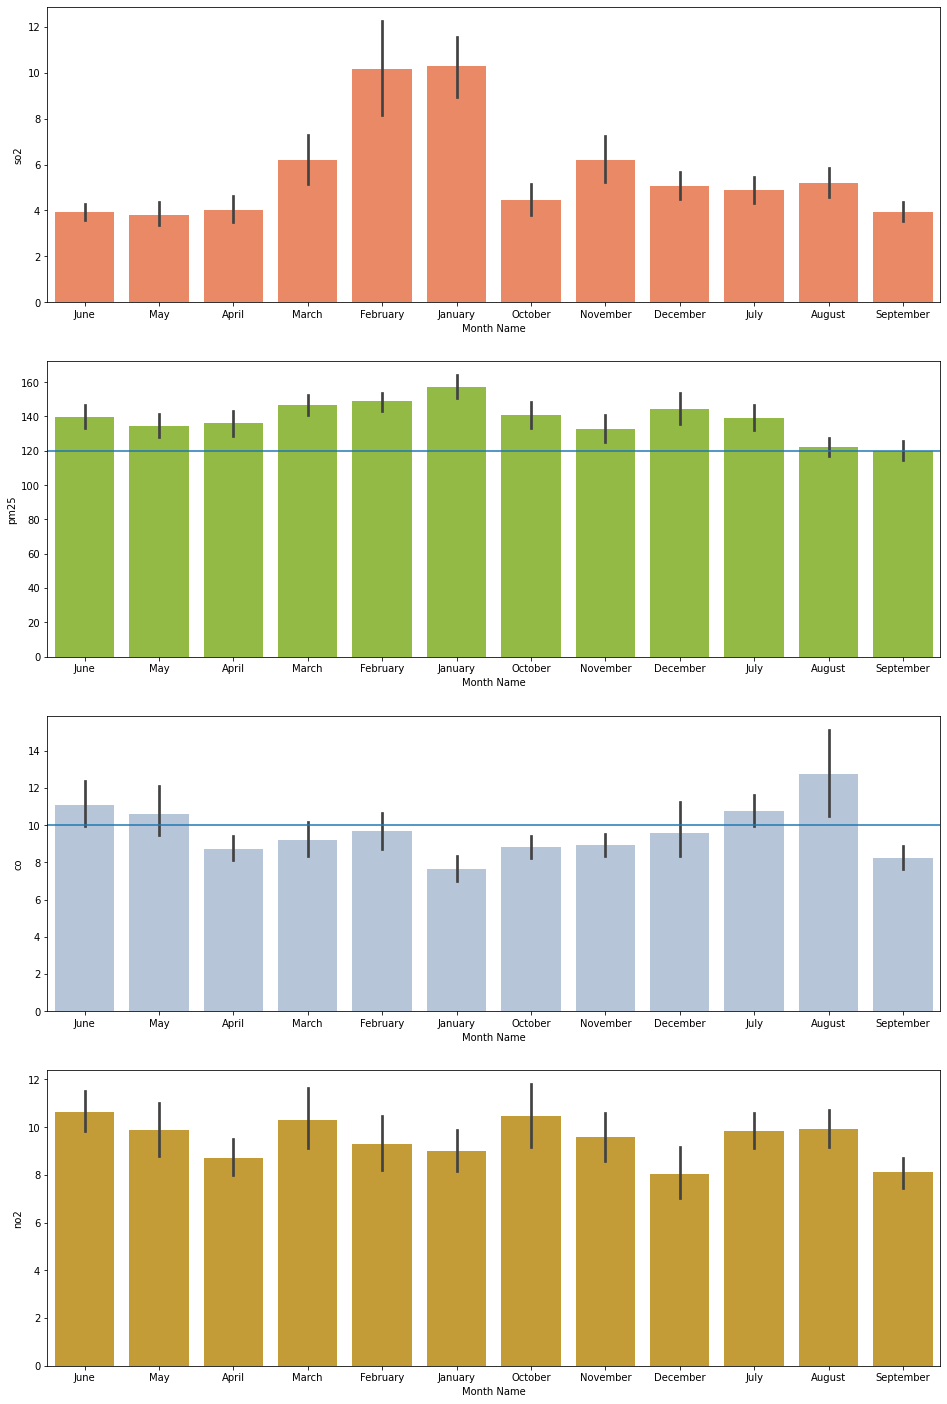

In [34]:
fig, axes = plt.subplots(figsize=(16,25),nrows=4)
sns.barplot(x=df["Month Name"],y=df['so2'],ax=axes[0],color='coral')
sns.barplot(x=df["Month Name"],y=df['pm25'],ax=axes[1],color='yellowgreen').axhline(y=120)
sns.barplot(x=df["Month Name"],y=df['co'],ax=axes[2],color='lightsteelblue').axhline(y=10)
sns.barplot(x=df["Month Name"],y=df['no2'],ax=axes[3],color='goldenrod')

The blue line in co and pm25 plot is to mark the safety level, and it can be noticed that in August, co level usually crosses the limits.
Also the pm25 reaches its peak on january and slowly settles down in the subsequent months

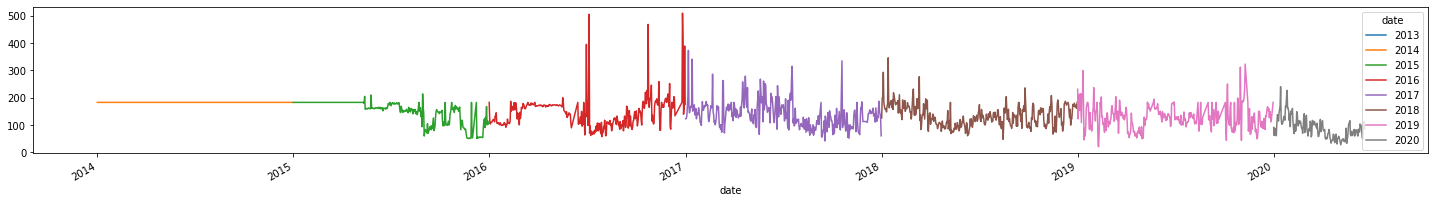

In [35]:

pv1 = pd.pivot_table(df, index=df.index, columns=df.index.year,
                    values='pm25', aggfunc='sum')


pv1.plot(figsize=(25,3))


# Effect of Lockdown-2020
During the months of April,May and June, the pollution level has significantly reduced due to shutting down of factories and absence of automobile emmissions.Here we can visualise the decline till may and it starts slowly rising again by last part of may, as the lockdown was lifted step by step.

In [36]:
df.sample(5)

,pm25,no2,so2,co,Year,Month,Weekday Name,Day,Month Name
date,,,,,,,,,
2019-02-28,102.0,4.0,12.0,7.0,2019,2,Thursday,28,February
2014-10-23,183.0,21.0,13.0,11.0,2014,10,Thursday,23,October
2015-12-18,56.0,2.0,1.0,16.0,2015,12,Friday,18,December
2017-09-22,126.0,11.0,5.0,4.0,2017,9,Friday,22,September
2017-01-26,148.0,17.0,1.0,4.0,2017,1,Thursday,26,January


In order to clearly visualise the difference, I am taking the data of March- June of all the years and putting it in a new dataframe to analyse and study it further.

In [37]:
df.dtypes


pm25            float64
no2             float64
so2             float64
co              float64
Year              int64
Month             int64
Weekday Name     object
Day               int64
Month Name       object
dtype: object

In [38]:
d2=df.loc[((df.Month >=4) &( df.Month<=6)),["pm25","co","so2","no2","Year","Day"]]

In [39]:
d2.sample(5)

,pm25,co,so2,no2,Year,Day
date,,,,,,
2017-05-07,105.0,4.0,2.0,9.0,2017,7
2020-05-06,37.0,7.0,2.0,3.0,2020,6
2014-06-14,183.0,2.0,7.0,24.0,2014,14
2017-06-30,169.0,4.0,4.0,15.0,2017,30
2016-04-18,169.0,4.0,2.0,9.0,2016,18


Plotting the effect of lockdown on the concentration of the four gaseous elements respectively.

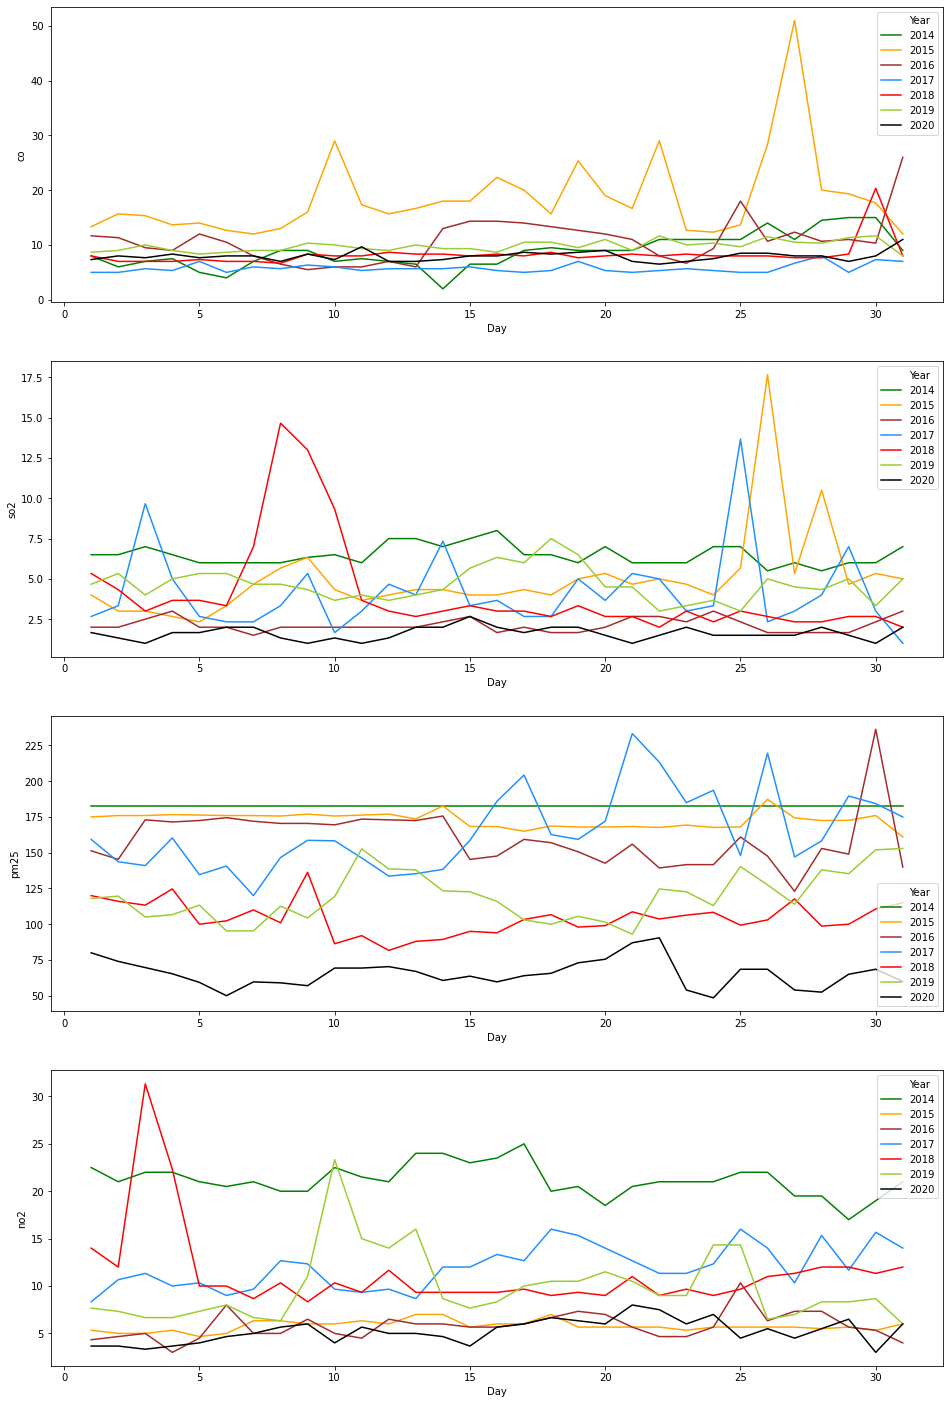

In [40]:
fig, axes = plt.subplots(figsize=(16,25),nrows=4)
sns.lineplot(x=d2.Day, y="co", hue='Year', data=d2,palette=['green','orange','brown','dodgerblue','red',"yellowgreen","black"],ci=None,ax=axes[0])
sns.lineplot(x=d2.Day, y="so2", hue='Year', data=d2,palette=['green','orange','brown','dodgerblue','red',"yellowgreen","black"],ci=None,ax=axes[1])
sns.lineplot(x=d2.Day, y="pm25", hue='Year', data=d2,palette=['green','orange','brown','dodgerblue','red',"yellowgreen","black"],ci=None,ax=axes[2])
sns.lineplot(x=d2.Day, y="no2", hue='Year', data=d2,palette=['green','orange','brown','dodgerblue','red',"yellowgreen","black"],ci=None,ax=axes[3])


**The blackline is 2020, I have taken the data of march-june and taken the mean value over 30 days and plotted it.**
We can easily understand and study the difference in the AQI, made by a lockdown order.
This can be further studied as to fight against climate change by understanding the effect of man made emmissions on the AQI.

The pm25 data for 2014 is not available and hence the imputed value line is plain.


# Heatmap
It is the best way to visualise the 2D data.
First I am making a pivot table to understand the changes in AQI with respect to time.

Month          1           2           3           4           5           6   \
Year                                                                            
2013          NaN         NaN         NaN         NaN         NaN         NaN   
2014   183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
2015   183.000000  183.000000  183.000000  183.000000  172.903226  163.413793   
2016   112.741935  138.241379  172.074074  171.633333  160.806452  134.894737   
2017   160.516129  155.535714  142.800000  170.233333  161.322581  162.133333   
2018   186.709677  162.071429  151.870968  107.600000   97.645161  106.666667   
2019   149.516129  123.423077  137.741935   84.966667  141.038462  137.392857   
2020   131.612903  109.206897   92.451613   59.400000   61.451613   81.473684   

Month          7           8           9           10          11          12  
Year                                                                           
2013          NaN         NaN

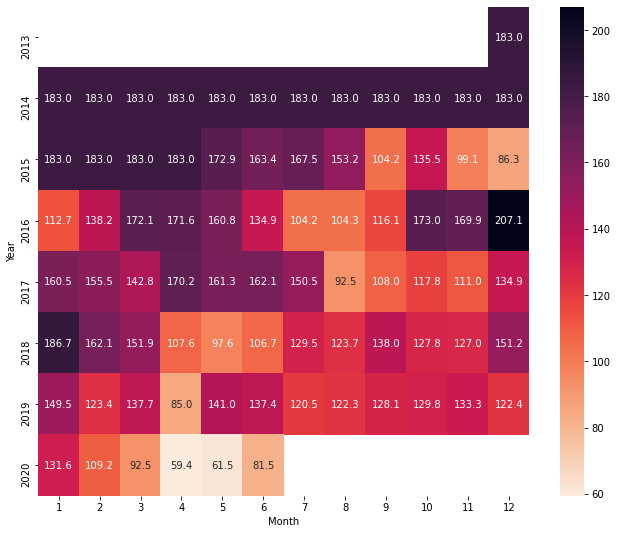

In [41]:
pvmp = pd.pivot_table(df, index=df.Year, columns=df["Month"],
                    values='pm25', aggfunc='mean')
print(pvmp)
plt.figure(figsize=(11,9))
sns.heatmap(data=pvmp,fmt=".1f",annot=True,cmap = sns.cm.rocket_r)

Here you can clearly see that during 4,5 (April and May) the pm2.5 emmission has decreased significantly.

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

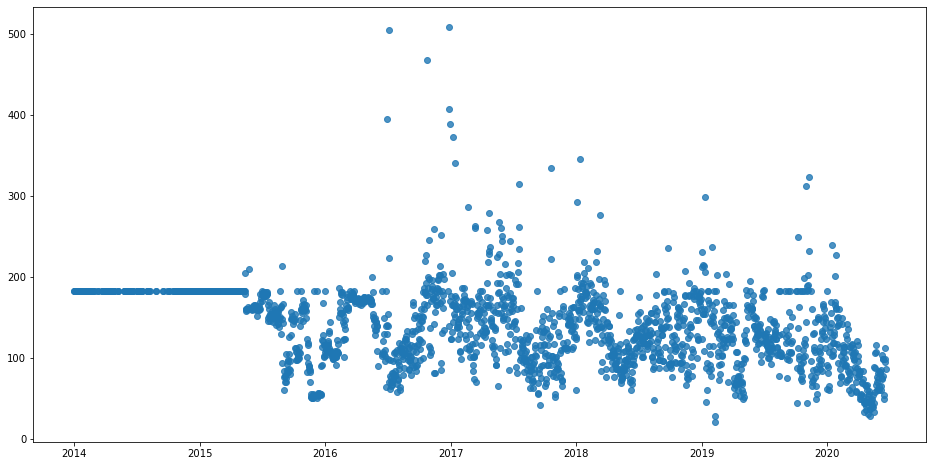

In [42]:
plt.figure(figsize=(16,8))
sns.regplot(x=df.index,y=df["pm25"])

I have made a regression plot to see the seasonal pattern of pm2.5 emmission.
We can clearly see a sine-wave pattern here, which suggests a pattern in production of emmissions possibly indicating climatic influences like wind season , rainy season or maybe the production target and schedule of industries making the emmissions.
